
**PREPROCESSING**

The Dataset is loaded from the drive. To prepare data for the computation with CNN some preprocessing is applied.




In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%ls


Mounted at /gdrive
/gdrive
MyDrive/  Shareddrives/


In [ ]:
!unzip -q "Shareddrives/industrial/data/dataset.zip" -d "/"

In [ ]:
!unzip -q "Shareddrives/industrial/data/Pr.Dataset.zip" -d "/"

In [ ]:
shutil.rmtree("/content/Users")

In [ ]:
!unzip -q "Shareddrives/industrial/data/DataNew.zip" -d "/content"

In [ ]:
shutil.rmtree('/content/Pr.Dataset/validation/c9')
shutil.rmtree('/content/Pr.Dataset/test/c9')
shutil.rmtree('/content/Pr.Dataset/train/c9')

In [ ]:
import pandas as pd
import os.path
import random
import csv
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from distutils.dir_util import copy_tree
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from matplotlib.pyplot import imshow




**PATH COMPUTATION**

First dataset information about distribution of classes are controlled. As the cell below shows classes are balanced among them so it is possible to use the file "Ci" as train.
Path of the folder containing the image that are used during traning are memorized into a dictionary.
However, the dataset presents a test folderd without the target label for the image, to assess the goodness of the networks it is impossible to use them, so only train folder is used to compose the dataset to use for the classification task.





In [ ]:
path = "/content/Dataset/imgs/test"
num_files = len(os.listdir("/content/Dataset/imgs/test"))
print(num_files)

pathDict = dict()
max = 2800
for i in range(10):

  path = "/content/Dataset/imgs/train/c"+str(i)
  pathDict["c{0}".format(i)] = path
  num_files = len(os.listdir(path))
  print("CLASS label c"+str(i)+": "+str(num_files))


print(max)
d_items = pathDict.items()

79726
CLASS label c0: 2489
CLASS label c1: 2267
CLASS label c2: 2317
CLASS label c3: 2346
CLASS label c4: 2326
CLASS label c5: 2312
CLASS label c6: 2325
CLASS label c7: 2002
CLASS label c8: 1911
CLASS label c9: 2129
2800


The cell blow shows an example of an image, and the corresponding size, that is shared btween all the image in the dataset so no reshape has to be applied to them.



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import PIL
from PIL import Image

c


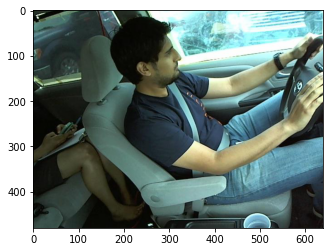

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 


example_img = os.path.join(pathDict["c0"],os.listdir(pathDict["c0"])[1])
print(example_img[1])
image = Image.open(example_img,'r')
imshow(image)

image=np.array(image) 


In [ ]:

new_dataset_path = "/content/Pr.Dataset"
test_path = new_dataset_path + "/test"
train_path = new_dataset_path + "/train"
validation_path = new_dataset_path + "/validation"

c0_path = train_path+ "/c0"
c1_path = train_path+ "/c1"
c2_path = train_path+ "/c2"
c3_path = train_path+ "/c3"
c4_path = train_path+ "/c4"
c5_path = train_path+ "/c5"
c6_path = train_path+ "/c6"
c7_path = train_path+ "/c7"
c8_path = train_path+ "/c8"
c9_path = train_path+ "/c9"

c0val_path = validation_path+ "/c0"
c1val_path = validation_path+ "/c1"
c2val_path = validation_path+ "/c2"
c3val_path = validation_path+ "/c3"
c4val_path = validation_path+ "/c4"
c5val_path = validation_path+ "/c5"
c6val_path = validation_path+ "/c6"
c7val_path = validation_path+ "/c7"
c8val_path = validation_path+ "/c8"
c9val_path = validation_path+ "/c9"

c0test_path = test_path+ "/c0"
c1test_path = test_path+ "/c1"
c2test_path = test_path+ "/c2"
c3test_path = test_path+ "/c3"
c4test_path = test_path+ "/c4"
c5test_path = test_path+ "/c5"
c6test_path = test_path+ "/c6"
c7test_path = test_path+ "/c7"
c8test_path = test_path+ "/c8"
c9test_path = test_path+ "/c9"



In [ ]:
new_dataset_path = "/content/Pr.dataset"
test_path = new_dataset_path + "/test"
train_path = new_dataset_path + "/train"
validation_path = new_dataset_path + "/validation"

c0_path = train_path+ "/safe"
c1_path = train_path+ "/cell"
c2_path = train_path+ "/dist"

c0test_path = validation_path+ "/safe"
c1test_path = validation_path+ "/cell"
c2test_path = validation_path+ "/dist"

c0val_path = test_path+ "/safe"
c1val_path = test_path+ "/cell"
c2val_path = test_path+ "/dist"


In [ ]:
new_dataset_path = "/content/Rasp"
test_path = new_dataset_path + "/cell"
train_path = new_dataset_path + "/safe"
validation_path = new_dataset_path + "/dist"

c0_path = train_path+ "/safe"
c1_path = train_path+ "/cell"
c2_path = train_path+ "/dist"

c0test_path = validation_path+ "/safe"
c1test_path = validation_path+ "/cell"
c2test_path = validation_path+ "/dist"

c0val_path = test_path+ "/safe"
c1val_path = test_path+ "/cell"
c2val_path = test_path+ "/dist"

In [ ]:

# create the tree folders

os.makedirs(new_dataset_path)
os.makedirs(validation_path)
os.makedirs(test_path)
os.makedirs(train_path)

os.makedirs(c0_path)
os.makedirs(c1_path)
os.makedirs(c2_path)

os.makedirs(c0val_path)
os.makedirs(c1val_path)
os.makedirs(c2val_path)


os.makedirs(c0test_path)
os.makedirs(c1test_path)
os.makedirs(c2test_path)


TO REMOVE SOME IMAGES

In [ ]:
delta_image = 0;
count = 0
for path in d_items:

  num_files = len(os.listdir(path[1]))
  os.chdir(path[1])
  print("Before removing:")
  print(num_files)
   
  for img in os.listdir(path[1]):

    image_path = os.path.join(path[1],img)

    image_name = img.split(".")
    image_name_after_split = image_name[0].split("-")


    if len(image_name_after_split) == 2:
      if image_name_after_split[1] == "Aug":
        #print("Removed: " + image_path)
        os.remove(image_path)


  print("After removing")
  num_files = len(os.listdir(path[1]))
  print(num_files)
  

NameError: ignored

# Nuova sezione
**Image reshaping**

CNN needs as input images that are all of the same size. However, during the "data augmentation" the dimension of the images has suffered some change in case of rotation. So it is possible to find some images that are 640x480 other that are 480x640. To fullfill the request of a CNN as input all images are reshaped to 250x250. The cell below shows an example

In [ ]:
example_img = "/content/Rasp/dist/image84.jpg"
print(example_img[1])
image = Image.open(example_img,'r')
resized_image = image.resize((300,200))
print(resized_image.size)

imshow(resized_image)
print(image.size)

c
(300, 200)


# Nuova sezione
**PROCESSED DATASET WITH RGB IMAGEs**

In [ ]:
import PIL
from PIL import Image

resize_dim = (300, 200)

for path in d_items:

  for elem in os.listdir(path[1]):

    img = Image.open(os.path.join(path[1],elem))

    img = img.resize(resize_dim, PIL.Image.ANTIALIAS)
    
    img.save(train_path +"/"+path[0]+"/"+elem)



In [ ]:
shutil.rmtree("/content/Rasp")

In [ ]:
shutil.rmtree("/content/newData")

In [ ]:
import PIL
from PIL import Image
import cv2

resize_dim = (300, 200)
rasp = "/content/Rasp/"
for path in os.listdir("/content/newData"):
  if path == ".DS_Store":
      continue
  for elem in os.listdir("/content/newData/"+path):
    if elem == ".DS_Store":
      continue
    
    img = Image.open("/content/newData/"+path+"/"+elem)
    rgb_im = img.convert('RGB')
    img = rgb_im.resize(resize_dim, PIL.Image.ANTIALIAS)
    
    img.save(rasp+path+"/"+elem)


In [ ]:
print(len(os.listdir("/content/Rasp/cell")))
print(len(os.listdir("/content/newData/cell")))
print(len(os.listdir("/content/Rasp/safe")))
print(len(os.listdir("/content/newData/safe")))
print(len(os.listdir("/content/Rasp/dist")))
print(len(os.listdir("/content/newData/dist")))

118
117
63
62
24
23


# Nuova sezione
**SPLIT DATA**

Data are already spitted in to test,train set and test. Random sample are picked from train set to create the validation set and test set.

In [ ]:
pathTrain = '/content/Pr.Dataset/train/'

for path in d_items:
  val_rate = int(len(os.listdir(os.path.join(pathTrain,path[0])))*0.1)
  test_rate = int(len(os.listdir(os.path.join(pathTrain,path[0])))*0.2)
  count_val = val_rate
  count_test = test_rate

  while(count_val > 0):
    files = os.listdir(os.path.join(pathTrain, path[0]))
    random_path_image = random.choice(files)
    count_val = count_val - 1
    random_img = os.path.join(os.path.join(pathTrain, path[0]),random_path_image)
    shutil.move(random_img, os.path.join(validation_path, path[0])+'/'+random_path_image)

  while(count_test > 0):
    files = os.listdir(os.path.join(pathTrain, path[0]))
    random_path_image = random.choice(files)
    count_test = count_test - 1
    random_img = os.path.join(os.path.join(pathTrain, path[0]),random_path_image)
    shutil.move(random_img, os.path.join(test_path, path[0])+'/'+random_path_image)

  count_val = val_rate
  count_test = test_rate



    



In [ ]:
shutil.rmtree("/content/Pr.dataset")

In [ ]:

train_path = "/content/Pr.Dataset/train"
train_new = "/content/Pr.dataset/train"
max = 0
maxold_safe = 0
maxold_cell = 0
maxold_dist = 0
frist_safe = True
frist_cell = True
frist_dist = True
for elem in os.listdir(train_path):

  if elem == "c0":
    if frist_safe == True:
      max = 0
    maxold_safe = 800
    label = "safe"
    max = max + maxold_safe
  elif elem == "c1" or elem == "c2" or elem == "c3" or elem == "c4":
    if frist_cell == True:
      max = 0
      frist_cell = False
    max = maxold_cell
    label = "cell"
    max = 200 + max
    maxold_cell = max
  elif elem == "c5" or elem == "c6" or elem == "c7" or elem == "c8":
    if frist_dist == True:
      max = 0
      frist_dist = False
    max = maxold_dist 
    label = "dist"
    max = 200 + max
    maxold_dist = max
  
  files = os.listdir(train_path+"/"+elem)


  while(len(os.listdir(train_new +"/"+label)) < max):
    random_path_image = random.choice(files)
    image = Image.open(train_path+"/"+elem+"/"+random_path_image,'r') 
    image.save(train_new +"/"+label+"/"+random_path_image)
 


In [ ]:
files = os.listdir("/content/Pr.dataset/train/cell")
print(len(files))

800


In [ ]:

test_path = "/content/Pr.Dataset/test"
test_new = "/content/Pr.dataset/test"
max = 0
maxold_safe = 0
maxold_cell = 0
maxold_dist = 0
frist_safe = True
frist_cell = True
frist_dist = True
for elem in os.listdir(test_path):

  if elem == "c0":
    if frist_safe == True:
      max = 0
    maxold_safe = 200
    label = "safe"
    max = max + maxold_safe
  elif elem == "c1" or elem == "c2" or elem == "c3" or elem == "c4":
    if frist_cell == True:
      max = 0
      frist_cell = False
    max = maxold_cell
    label = "cell"
    max = 50 + max
    maxold_cell = max
  elif elem == "c5" or elem == "c6" or elem == "c7" or elem == "c8":
    if frist_dist == True:
      max = 0
      frist_dist = False
    max = maxold_dist 
    label = "dist"
    max = 50 + max
    maxold_dist = max
  
  files = os.listdir(test_path+"/"+elem)


  while(len(os.listdir(test_new +"/"+label)) < max):
    random_path_image = random.choice(files)
    image = Image.open(test_path+"/"+elem+"/"+random_path_image,'r') 
    image.save(test_new +"/"+label+"/"+random_path_image)
 


In [ ]:
val_path = "/content/Pr.Dataset/validation"
val_new = "/content/Pr.dataset/validation"
max = 0
maxold_safe = 0
maxold_cell = 0
maxold_dist = 0
frist_safe = True
frist_cell = True
frist_dist = True
for elem in os.listdir(val_path):

  if elem == "c0":
    if frist_safe == True:
      max = 0
    maxold_safe = 100
    label = "safe"
    max = max + maxold_safe
  elif elem == "c1" or elem == "c2" or elem == "c3" or elem == "c4":
    if frist_cell == True:
      max = 0
      frist_cell = False
    max = maxold_cell
    label = "cell"
    max = 20 + max
    maxold_cell = max
  elif elem == "c5" or elem == "c6" or elem == "c7" or elem == "c8":
    if frist_dist == True:
      max = 0
      frist_dist = False
    max = maxold_dist 
    label = "dist"
    max = 20 + max
    maxold_dist = max
  
  files = os.listdir(val_path+"/"+elem)


  while(len(os.listdir(val_new +"/"+label)) < max):
    random_path_image = random.choice(files)
    image = Image.open(val_path+"/"+elem+"/"+random_path_image,'r') 
    image.save(val_new +"/"+label+"/"+random_path_image)
 

In [ ]:

print(len(os.listdir("/content/newData/safe")))
print(len(os.listdir("/content/newData/dist")))
print(len(os.listdir("/content/newData/cell")))

62
23
117


In [ ]:

for i in range(10):

  path_train = "/content/Pr.Dataset/train/c"+str(i)
  path_val = "/content/Pr.Dataset/validation/c"+str(i)
  path_test = "/content/Pr.Dataset/test/c"+str(i)
  num_files_train = len(os.listdir(path_train))
  num_files_validation = len(os.listdir(path_val))
  num_files_test = len(os.listdir(path_test))


 
  print("Num file train c"+str(i)+": "+str(num_files_train))
  print("Num file validation c"+str(i)+": "+str(num_files_validation))
  print("Num file test c"+str(i)+": "+str(num_files_test))




Num file train c0: 1744
Num file validation c0: 248
Num file test c0: 497
Num file train c1: 1588
Num file validation c1: 226
Num file test c1: 453
Num file train c2: 1623
Num file validation c2: 231
Num file test c2: 463
Num file train c3: 1643
Num file validation c3: 234
Num file test c3: 469
Num file train c4: 1629
Num file validation c4: 232
Num file test c4: 465
Num file train c5: 1619
Num file validation c5: 231
Num file test c5: 462
Num file train c6: 1628
Num file validation c6: 232
Num file test c6: 465
Num file train c7: 1402
Num file validation c7: 200
Num file test c7: 400
Num file train c8: 1338
Num file validation c8: 191
Num file test c8: 382
Num file train c9: 1492
Num file validation c9: 212
Num file test c9: 425


**DATA AUGMENTATION**

Image are not fully balanced, so to obtain full balanced sample data augmentation is applied.



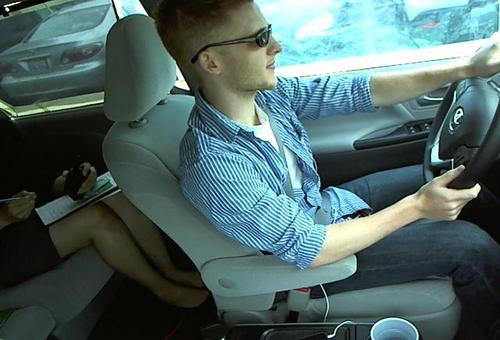

In [ ]:
example_img = '/content/Pr.Dataset/train/c0/img_100026.jpg'
image = Image.open(example_img,'r')
tf_image = np.array(image)
image

In [ ]:
vertical_flip = tf.image.flip_up_down(tf_image)
horizontal_flip = tf.image.flip_left_right(tf_image)
rotation_90 = tf.image.rot90(tf_image, k=1)
rotation_180 = tf.image.rot90(tf_image, k=2)
rotation_270 = tf.image.rot90(tf_image, k=3)


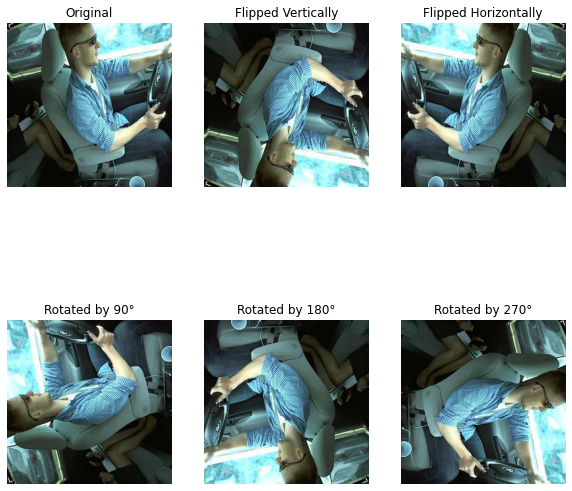

In [ ]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

fig.add_subplot(2, 3, 2)
plt.imshow(vertical_flip)
plt.axis('off')
plt.title("Flipped Vertically")

fig.add_subplot(2, 3, 3)
plt.imshow(horizontal_flip)
plt.axis('off')
plt.title("Flipped Horizontally")

fig.add_subplot(2, 3, 4)
plt.imshow(rotation_90)
plt.axis('off')
plt.title("Rotated by 90°")

fig.add_subplot(2, 3, 5)
plt.imshow(rotation_180)
plt.axis('off')
plt.title("Rotated by 180°")

fig.add_subplot(2, 3, 6)
plt.imshow(rotation_270)
plt.axis('off')
_ = plt.title("Rotated by 270°")

In [ ]:

def random_flip_or_rotation(original_image):
  '''
  random_flip_or_rotation randomly rotates or flips the image
  :param original_image: the image on which to perform the transformation
  :return: the transformed image
  '''
  horizontal = random.randint(0,1)
  if horizontal:
    new_image = tf.image.flip_left_right(original_image)
  else:
    new_image = tf.image.flip_up_down(original_image)
  

  return np.asarray(new_image)

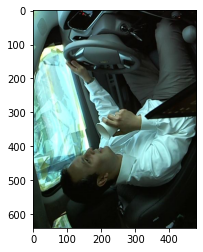

In [ ]:
files=os.listdir(pathDict["c6"])
random_path_image = random.choice(files)
random_img = os.path.join(pathDict["c6"],"img_57186.jpg")

image = Image.open(random_img,'r')

image_array=np.array(image) 
new_image = random_flip_or_rotation(image_array)
imshow(new_image)

In [ ]:
pathDictPr = dict()

for i in range(10):

  path = "/content/Pr.Dataset/train/c"+str(i)
  pathDictPr["c{0}".format(i)] = path
  num_files = len(os.listdir(path))
  print("CLASS label c"+str(i)+": "+str(num_files))

d_items_pr = pathDictPr.items()
print(d_items_pr)

CLASS label c0: 1744
CLASS label c1: 1588
CLASS label c2: 1623
CLASS label c3: 1643
CLASS label c4: 1629
CLASS label c5: 1619
CLASS label c6: 1628
CLASS label c7: 1402
CLASS label c8: 1338
CLASS label c9: 1492
dict_items([('c0', '/content/Pr.Dataset/train/c0'), ('c1', '/content/Pr.Dataset/train/c1'), ('c2', '/content/Pr.Dataset/train/c2'), ('c3', '/content/Pr.Dataset/train/c3'), ('c4', '/content/Pr.Dataset/train/c4'), ('c5', '/content/Pr.Dataset/train/c5'), ('c6', '/content/Pr.Dataset/train/c6'), ('c7', '/content/Pr.Dataset/train/c7'), ('c8', '/content/Pr.Dataset/train/c8'), ('c9', '/content/Pr.Dataset/train/c9')])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
delta_image = 0;
count = 0

max = 0

for i in range(10):
  path = "/content/Pr.Dataset/train/c"+str(i)
  num_files = len(os.listdir(path))
  if num_files > max:
    max = num_files

print("Max: " + str(max))

for path in d_items_pr:

  num_files = len(os.listdir(path[1]))
  os.chdir(path[1])
  print("Before augmenting:")
  print(num_files)

  while len(os.listdir(path[1])) < max:

    files = os.listdir(path[1])
    random_path_image = random.choice(files)

    random_img = os.path.join(path[1],random_path_image)

    image = cv2.imread(random_img)
   
    new_image = random_flip_or_rotation(image)

    image_name = random_path_image.split(".")

    already_augmented_image = image_name[0].split("-")


    if len(already_augmented_image) == 2:

      if  already_augmented_image[1] == "Aug":
        continue

    new_image_name = image_name[0]+"-Aug.jpg"
    plt.imsave(new_image_name, new_image)




  print("After augmenting")
  num_files = len(os.listdir(path[1]))
  print(num_files)
  

Max: 1744
Before augmenting:
1744
After augmenting
1744
Before augmenting:
1588
After augmenting
1744
Before augmenting:
1623
After augmenting
1744
Before augmenting:
1643
After augmenting
1744
Before augmenting:
1629
After augmenting
1744
Before augmenting:
1619
After augmenting
1744
Before augmenting:
1628
After augmenting
1744
Before augmenting:
1402
After augmenting
1744
Before augmenting:
1338
After augmenting
1744
Before augmenting:
1492
After augmenting
1744


In [ ]:
for path in os.listdir("/content/Rasp"):

  for elem in os.listdir("/content/Rasp/"+path):
    
    path1 = "/content/Rasp/"+path+"/"+elem
    if elem == '.ipynb_checkpoints':
      shutil.rmtree(path1)
    
    image = Image.open(path1,'r')
    rgb_im = image.convert('RGB')
    image_array=np.array(rgb_im) 
 
    new_image = random_flip_or_rotation(image)

    image_name = path1.split(".")
    already_augmented_image = image_name[0].split("-")
    
    if len(already_augmented_image) == 2:

      if  already_augmented_image[1] == "Aug":
        continue

    new_image_name = image_name[0]+"-Aug.jpg"
    plt.imsave(new_image_name, new_image)
    



In [ ]:
print(len(os.listdir("/content/Rasp/cell")))
print(len(os.listdir("/content/newData/cell")))
print(len(os.listdir("/content/Rasp/safe")))
print(len(os.listdir("/content/newData/safe")))
print(len(os.listdir("/content/Rasp/dist")))
print(len(os.listdir("/content/newData/dist")))

234
117
124
62
46
23


In [ ]:
!zip -r "Shareddrives/industrial/data/Rasp.zip" "/content/Rasp"

  adding: content/Rasp/ (stored 0%)
  adding: content/Rasp/cell/ (stored 0%)
  adding: content/Rasp/cell/image47-Aug.jpg (deflated 2%)
  adding: content/Rasp/cell/image45.jpg (deflated 2%)
  adding: content/Rasp/cell/image38.jpg (deflated 2%)
  adding: content/Rasp/cell/cell1.jpg (deflated 1%)
  adding: content/Rasp/cell/image43.jpg (deflated 2%)
  adding: content/Rasp/cell/image36.jpg (deflated 2%)
  adding: content/Rasp/cell/cell5-Aug.jpg (deflated 1%)
  adding: content/Rasp/cell/image47 (3)-Aug.jpg (deflated 1%)
  adding: content/Rasp/cell/image75.jpg (deflated 2%)
  adding: content/Rasp/cell/image50 (2)-Aug.jpg (deflated 2%)
  adding: content/Rasp/cell/image46.jpg (deflated 2%)
  adding: content/Rasp/cell/image44 (2)-Aug.jpg (deflated 1%)
  adding: content/Rasp/cell/image25.jpg (deflated 2%)
  adding: content/Rasp/cell/image37 (2).jpg (deflated 1%)
  adding: content/Rasp/cell/image47 (3).jpg (deflated 1%)
  adding: content/Rasp/cell/image34-Aug.jpg (deflated 2%)
  adding: content/R

# Nuova sezione
**TEST SET CREATED BY HAND**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%ls


Mounted at /gdrive
/gdrive
MyDrive/  Shareddrives/


In [ ]:
!unzip -q "Shareddrives/industrial/data/Test_hand.zip" -d "/content"

In [ ]:

for i in range(10):

  path = "/content/test_hand/c"+str(i)
 
  num_files = len(os.listdir(path))
  print("CLASS label c"+str(i)+": "+str(num_files))



CLASS label c0: 59
CLASS label c1: 60
CLASS label c2: 59
CLASS label c3: 59
CLASS label c4: 60
CLASS label c5: 60
CLASS label c6: 59
CLASS label c7: 60
CLASS label c8: 60
CLASS label c9: 55


In [ ]:
for i in range(10):

  path = "/content/data_to_test/c"+str(i)
  num_files = len(os.listdir(path))
  print("Before CLASS label c"+str(i)+": "+str(num_files))

  if num_files < 60:
 
    continue

  while num_files > 60:

    files = os.listdir(path)

    random_path_image = random.choice(files)
    random_img = os.path.join(path,random_path_image)
    os.remove(random_img)
    num_files = num_files - 1

  num_files = len(os.listdir(path))
  print("After CLASS label c"+str(i)+": "+str(num_files))


  
 


Before CLASS label c0: 87
After CLASS label c0: 60
Before CLASS label c1: 86
After CLASS label c1: 60
Before CLASS label c2: 99
After CLASS label c2: 60
Before CLASS label c3: 87
After CLASS label c3: 60
Before CLASS label c4: 93
After CLASS label c4: 60
Before CLASS label c5: 91
After CLASS label c5: 60
Before CLASS label c6: 85
After CLASS label c6: 60
Before CLASS label c7: 87
After CLASS label c7: 60
Before CLASS label c8: 63
After CLASS label c8: 60
Before CLASS label c9: 56


In [ ]:
TEST_HAND = '/content/test_handGrey'

c0_path = TEST_HAND+ "/c0"
c1_path = TEST_HAND+ "/c1"
c2_path = TEST_HAND+ "/c2"
c3_path = TEST_HAND+ "/c3"
c4_path = TEST_HAND+ "/c4"
c5_path = TEST_HAND+ "/c5"
c6_path = TEST_HAND+ "/c6"
c7_path = TEST_HAND+ "/c7"
c8_path = TEST_HAND+ "/c8"
c9_path = TEST_HAND+ "/c9"


In [ ]:
# create the tree folders

os.makedirs(TEST_HAND)


os.makedirs(c0_path)
os.makedirs(c1_path)
os.makedirs(c2_path)
os.makedirs(c3_path)
os.makedirs(c4_path)
os.makedirs(c5_path)
os.makedirs(c6_path)
os.makedirs(c7_path)
os.makedirs(c8_path)
os.makedirs(c9_path)


In [ ]:
import PIL
from PIL import Image


for i in range(10):

  path = "/content/test_hand/c"+str(i)

  
  for elem in os.listdir(path):
    if elem == '.DS_Store':
      continue
    img = Image.open(os.path.join(path,elem))
    gray_img = img.convert("L")
    gray_img.save("/content/test_handGrey/c"+str(i)+"/"+elem)


In [ ]:
!zip -r "Shareddrives/industrial/data/Test_handGrey.zip" "/content/test_handGrey"

  adding: content/test_handGrey/ (stored 0%)
  adding: content/test_handGrey/c4/ (stored 0%)
  adding: content/test_handGrey/c4/img_823.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_863.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_101154.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_1033.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_856.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_101019.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_915.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_101316.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_669.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_1040.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_920.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_868.jpg (deflated 0%)
  adding: content/test_handGrey/c4/img_100047.jpg (deflated 1%)
  adding: content/test_handGrey/c4/img_101285.jpg (deflated 1%)
  adding: content/test_handGrey/c4/i